# 로지스틱 회귀
- 대표적인 이진분류 알고리즘
- 시그모이드 함수 사용
```
# sigmoid
def sigmoid(x) : 
  return 1/(1+np.exp(-x))
```
- W(가중치)가 커질수록, 시그모이드 함수의 기울기가 커진다.

## 로지스틱 회귀에서의 cost function
- mse를 사용하게 되면, local minimum이 많아져, global minimum을 찾기 힘들다.
- 따라서, __binary cross entropy__ 사용
  - cost = -[y*logH(x)+(1-y)*log(1-H(x))]



## 로지스틱 회귀 구현

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
torch.manual_seed(1)

In [3]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [4]:
W = torch.zeros((2,1), requires_grad = True)
b = torch.zeros(1, requires_grad = True)

In [5]:
hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b))) # torch.sigmoid(x_train.matmul(W)+b)

In [6]:
losses = -(y_train*torch.log(hypothesis) + (1-y_train)*torch.log(1-hypothesis))

In [7]:
print(losses)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward0>)


In [8]:
cost = torch.mean(losses)

In [9]:
# library

F.binary_cross_entropy(hypothesis, y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward0>)

## nn.Module로 구현

In [10]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [11]:
model = nn.Sequential( # nn.Sequential : layer를 쌓을 수 있도록 해주는 역할
    nn.Linear(2,1),
    nn.Sigmoid()
)

In [12]:
model(x_train)

tensor([[0.4020],
        [0.4147],
        [0.6556],
        [0.5948],
        [0.6788],
        [0.8061]], grad_fn=<SigmoidBackward0>)

In [13]:
optimizer = optim.SGD(model.parameters(), lr = 1)

In [14]:
nb_epochs = 1000
for epoch in range(nb_epochs+1) : 

  hypothesis = model(x_train)
  cost = F.binary_cross_entropy(hypothesis, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()
  
  # 20번마다 로그 출력
  if epoch % 20 == 0:
      prediction = (hypothesis >= torch.FloatTensor([0.5])) # 예측값이 0.5를 넘으면 True로 간주
      correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주 / boolean.float() : True -> 1, False -> 0
      accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
      print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
          epoch, nb_epochs, cost.item(), accuracy * 100,
      ))

Epoch    0/1000 Cost: 0.539713 Accuracy 83.33%
Epoch   20/1000 Cost: 0.441875 Accuracy 66.67%
Epoch   40/1000 Cost: 0.316358 Accuracy 83.33%
Epoch   60/1000 Cost: 0.220498 Accuracy 100.00%
Epoch   80/1000 Cost: 0.157299 Accuracy 100.00%
Epoch  100/1000 Cost: 0.134272 Accuracy 100.00%
Epoch  120/1000 Cost: 0.118297 Accuracy 100.00%
Epoch  140/1000 Cost: 0.105779 Accuracy 100.00%
Epoch  160/1000 Cost: 0.095704 Accuracy 100.00%
Epoch  180/1000 Cost: 0.087420 Accuracy 100.00%
Epoch  200/1000 Cost: 0.080486 Accuracy 100.00%
Epoch  220/1000 Cost: 0.074595 Accuracy 100.00%
Epoch  240/1000 Cost: 0.069526 Accuracy 100.00%
Epoch  260/1000 Cost: 0.065118 Accuracy 100.00%
Epoch  280/1000 Cost: 0.061247 Accuracy 100.00%
Epoch  300/1000 Cost: 0.057820 Accuracy 100.00%
Epoch  320/1000 Cost: 0.054764 Accuracy 100.00%
Epoch  340/1000 Cost: 0.052022 Accuracy 100.00%
Epoch  360/1000 Cost: 0.049546 Accuracy 100.00%
Epoch  380/1000 Cost: 0.047299 Accuracy 100.00%
Epoch  400/1000 Cost: 0.045251 Accuracy 100

In [15]:
a = torch.FloatTensor([[True], [True], [False], [False], [True]])
a.float()

tensor([[1.],
        [1.],
        [0.],
        [0.],
        [1.]])

## Class로 구현하기

In [16]:
model = nn.Sequential(
    nn.Linear(2,1),
    nn.Sigmoid()
)

In [17]:
class BinaryClassifier(nn.Module):
  def __init__(self) : 
    super().__init__()
    self.linear = nn.Linear(2,1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x) :
    return self.sigmoid(self.linear(x))

In [18]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)


In [19]:
model = BinaryClassifier()

In [20]:
optimizer = optim.SGD(model.parameters(), lr = 1)

In [21]:
nb_epochs = 1000
for epoch in range(nb_epochs+1) : 
  preds = model(x_train)
  cost = F.binary_cross_entropy(preds, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch%20 == 0 : 
    prediction = preds >= torch.FloatTensor([0.5])
    correct_prediction = prediction.float() == y_train
    accuracy = correct_prediction.sum().item() / len(correct_prediction)
    print("Epoch: {:4d}/{} Cost: {:.6f} Accuracy: {:2.2f}%".format(epoch, nb_epochs, cost.item(), accuracy*100))

Epoch:    0/1000 Cost: 0.778947 Accuracy: 33.33%
Epoch:   20/1000 Cost: 0.446548 Accuracy: 66.67%
Epoch:   40/1000 Cost: 0.318945 Accuracy: 83.33%
Epoch:   60/1000 Cost: 0.222594 Accuracy: 100.00%
Epoch:   80/1000 Cost: 0.158160 Accuracy: 100.00%
Epoch:  100/1000 Cost: 0.134716 Accuracy: 100.00%
Epoch:  120/1000 Cost: 0.118640 Accuracy: 100.00%
Epoch:  140/1000 Cost: 0.106051 Accuracy: 100.00%
Epoch:  160/1000 Cost: 0.095925 Accuracy: 100.00%
Epoch:  180/1000 Cost: 0.087604 Accuracy: 100.00%
Epoch:  200/1000 Cost: 0.080641 Accuracy: 100.00%
Epoch:  220/1000 Cost: 0.074728 Accuracy: 100.00%
Epoch:  240/1000 Cost: 0.069641 Accuracy: 100.00%
Epoch:  260/1000 Cost: 0.065218 Accuracy: 100.00%
Epoch:  280/1000 Cost: 0.061336 Accuracy: 100.00%
Epoch:  300/1000 Cost: 0.057899 Accuracy: 100.00%
Epoch:  320/1000 Cost: 0.054835 Accuracy: 100.00%
Epoch:  340/1000 Cost: 0.052085 Accuracy: 100.00%
Epoch:  360/1000 Cost: 0.049603 Accuracy: 100.00%
Epoch:  380/1000 Cost: 0.047352 Accuracy: 100.00%
Epo

# 소프트맥스 회귀
- 3개 이상의 선택지로부터 1개를 선택하는 다중 클래스 분류(Multi-Class classification)
- One-Hot Encoding이 사용됨
- 실제 정답값을 one hot vector로 사용하고, 출력값과 각각의 one hot vector의 cost를 비교해서 학습시키는 원리
- cost function : __cross entropy__
  -  $cost(W) = -\frac{1}{n} \sum_{i=1}^{n} \sum_{j=1}^{k}y_{j}^{(i)}\ log(p_{j}^{(i)})$

### cross-entropy 함수 구현하기(Low level)


In [22]:
z = torch.FloatTensor([1, 2, 3])

In [23]:
hyp = F.softmax(z, dim = 0)
print(hyp)

tensor([0.0900, 0.2447, 0.6652])


In [24]:
hyp.sum() # 각각의 확률을 계산한것 -> sum = 1

tensor(1.)

In [25]:
z = torch.rand(3, 5, requires_grad=True)

In [26]:
hypothesis = F.softmax(z, dim = 1) # 두번째 차원에 대해 연산
print(hypothesis)

tensor([[0.1831, 0.2236, 0.1995, 0.2336, 0.1602],
        [0.1740, 0.1725, 0.1940, 0.1801, 0.2794],
        [0.2618, 0.1860, 0.1656, 0.2060, 0.1806]], grad_fn=<SoftmaxBackward0>)


In [27]:
hypothesis[0].sum()

tensor(1., grad_fn=<SumBackward0>)

In [28]:
y = torch.randint(5, (3,)).long()
print(y)

tensor([3, 1, 4])


- tensor.scatter_(dim, index, src)
  - dim : self에 반영될 차원 결정
  - index : self에 들어갈 src의 index 지정
  - src : self에 넣을 값

In [29]:
y_one_hot = torch.zeros_like(hypothesis)
y_one_hot.scatter_(1, y.unsqueeze(1),1)

tensor([[0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1.]])

In [30]:
cost = (y_one_hot * -torch.log(hypothesis)).sum(dim = 1).mean()
print(cost)

tensor(1.6410, grad_fn=<MeanBackward0>)


### cross-entropy 함수 구현하기(High level)


In [31]:
F.nll_loss(F.log_softmax(z, dim = 1), y)

tensor(1.6410, grad_fn=<NllLossBackward0>)

In [32]:
F.cross_entropy(z, y)

tensor(1.6410, grad_fn=<NllLossBackward0>)

## 소프트맥스 구현하기(Low-Level)

In [33]:
x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

In [34]:
y_one_hot = torch.zeros(8,3)
y_one_hot.scatter_(1, y_train.unsqueeze(1), 1)
print(y_one_hot.shape)

torch.Size([8, 3])


In [35]:
W = torch.zeros((4,3), requires_grad = True)
b = torch.zeros(1, requires_grad = True)

optimizer = optim.SGD([W,b], lr = 0.1)

In [36]:
nb_epochs = 1000
for epoch in range(nb_epochs+1) : 

  hypothesis = F.softmax(x_train.matmul(W)+b, dim = 1)

  cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  # 100번마다 로그 출력
  if epoch % 100 == 0:
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))


Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.761050
Epoch  200/1000 Cost: 0.689991
Epoch  300/1000 Cost: 0.643229
Epoch  400/1000 Cost: 0.604117
Epoch  500/1000 Cost: 0.568255
Epoch  600/1000 Cost: 0.533922
Epoch  700/1000 Cost: 0.500291
Epoch  800/1000 Cost: 0.466908
Epoch  900/1000 Cost: 0.433507
Epoch 1000/1000 Cost: 0.399962


## 소프트맥스 구현하기(High-Level)

In [37]:
model = nn.Linear(4,3)
optimizer = optim.SGD(model.parameters(), lr = 0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1) : 
  pred = model(x_train)
  cost = F.cross_entropy(pred, y_train)
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 20 == 0:
    print('Epoch {:4d}/{} Cost {:.6f}'.format(epoch, nb_epochs, cost))

Epoch    0/1000 Cost 3.258704
Epoch   20/1000 Cost 0.953265
Epoch   40/1000 Cost 0.793495
Epoch   60/1000 Cost 0.715929
Epoch   80/1000 Cost 0.670052
Epoch  100/1000 Cost 0.638818
Epoch  120/1000 Cost 0.615066
Epoch  140/1000 Cost 0.595627
Epoch  160/1000 Cost 0.578941
Epoch  180/1000 Cost 0.564155
Epoch  200/1000 Cost 0.550755
Epoch  220/1000 Cost 0.538408
Epoch  240/1000 Cost 0.526889
Epoch  260/1000 Cost 0.516036
Epoch  280/1000 Cost 0.505729
Epoch  300/1000 Cost 0.495876
Epoch  320/1000 Cost 0.486408
Epoch  340/1000 Cost 0.477268
Epoch  360/1000 Cost 0.468409
Epoch  380/1000 Cost 0.459796
Epoch  400/1000 Cost 0.451395
Epoch  420/1000 Cost 0.443179
Epoch  440/1000 Cost 0.435126
Epoch  460/1000 Cost 0.427214
Epoch  480/1000 Cost 0.419425
Epoch  500/1000 Cost 0.411744
Epoch  520/1000 Cost 0.404153
Epoch  540/1000 Cost 0.396641
Epoch  560/1000 Cost 0.389193
Epoch  580/1000 Cost 0.381798
Epoch  600/1000 Cost 0.374444
Epoch  620/1000 Cost 0.367120
Epoch  640/1000 Cost 0.359817
Epoch  660

### Class로 구현하기

In [38]:
class SoftmaxClassifierModel(nn.Module) : 
  def __init__(self) : 
    super().__init__()
    self.linear = nn.Linear(4,3)

  def forward(self, x) : 
    return self.linear(x)

In [39]:
model = SoftmaxClassifierModel()
optimizer = optim.SGD(model.parameters(), lr = 0.1)

nb_epochs = 1000
for epoch in range(nb_epochs+1) : 
  pred = model(x_train)
  cost = F.cross_entropy(pred, y_train)
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch%20 == 0 : 
    print('Epoch {:4d}/{} Cost {:.6f}'.format(epoch, nb_epochs, cost))

Epoch    0/1000 Cost 1.893225
Epoch   20/1000 Cost 1.068642
Epoch   40/1000 Cost 0.898944
Epoch   60/1000 Cost 0.820779
Epoch   80/1000 Cost 0.774544
Epoch  100/1000 Cost 0.742666
Epoch  120/1000 Cost 0.718245
Epoch  140/1000 Cost 0.698172
Epoch  160/1000 Cost 0.680863
Epoch  180/1000 Cost 0.665428
Epoch  200/1000 Cost 0.651325
Epoch  220/1000 Cost 0.638206
Epoch  240/1000 Cost 0.625832
Epoch  260/1000 Cost 0.614038
Epoch  280/1000 Cost 0.602704
Epoch  300/1000 Cost 0.591741
Epoch  320/1000 Cost 0.581079
Epoch  340/1000 Cost 0.570668
Epoch  360/1000 Cost 0.560464
Epoch  380/1000 Cost 0.550435
Epoch  400/1000 Cost 0.540555
Epoch  420/1000 Cost 0.530800
Epoch  440/1000 Cost 0.521153
Epoch  460/1000 Cost 0.511598
Epoch  480/1000 Cost 0.502122
Epoch  500/1000 Cost 0.492713
Epoch  520/1000 Cost 0.483363
Epoch  540/1000 Cost 0.474063
Epoch  560/1000 Cost 0.464804
Epoch  580/1000 Cost 0.455582
Epoch  600/1000 Cost 0.446390
Epoch  620/1000 Cost 0.437222
Epoch  640/1000 Cost 0.428075
Epoch  660

## 소프트맥스로 MNIST데이터 분류하기
- torchvision

In [40]:
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [42]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [43]:
random.seed(777)
torch.manual_seed(777)
if device == 'cuda' : 
  torch.cuda.manual_seed_all(777)

In [44]:
training_epochs = 15
batch_size = 100

In [45]:
mnist_train = dsets.MNIST(root = 'MNIST_data/',
                          train = True,
                          transform = transforms.ToTensor(),
                          download = True)
mnist_test = dsets.MNIST(root = 'MNIST_data/',
                          train = False,
                          transform = transforms.ToTensor(),
                          download = True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [46]:
dataloader = DataLoader(mnist_train, batch_size = batch_size, shuffle = True, drop_last = True) # drop_last : batch size를 충족하지 못하는 마지막 배치를 drop

In [47]:
# MNIST 데이터의 크기 : 28*28 / category : 10개 / bias = True : b 값을 사용할 것인지(default = True)
linear = nn.Linear(784, 10, bias = True).to(device)

In [48]:
criterion = nn.CrossEntropyLoss().to(device) # F.cross_entropy()
optimizer = optim.SGD(linear.parameters(), lr=0.1)

In [50]:
# Train

for epoch in range(training_epochs) : 
  avg_cost = 0
  total_batch = len(dataloader)

  for X,Y in dataloader : 
    # bs = 100 이므로 X는 100*784의 size
    X = X.view(-1, 28*28).to(device)
    # label은 one hot encoding이 되지 않은 상태 : 0~9
    Y = Y.to(device)

    optimizer.zero_grad()
    pred = linear(X)
    cost = criterion(pred, Y)
    cost.backward()
    optimizer.step()

    avg_cost += cost/total_batch

  print('Epoch {}/{} Cost {}'.format(epoch+1, training_epochs, avg_cost))

Epoch 0/15 Cost 0.5351505875587463
Epoch 1/15 Cost 0.3595777153968811
Epoch 2/15 Cost 0.33126428723335266
Epoch 3/15 Cost 0.31640467047691345
Epoch 4/15 Cost 0.30710697174072266
Epoch 5/15 Cost 0.30045655369758606
Epoch 6/15 Cost 0.2949334383010864
Epoch 7/15 Cost 0.29095619916915894
Epoch 8/15 Cost 0.28707411885261536
Epoch 9/15 Cost 0.2845156192779541
Epoch 10/15 Cost 0.2819140553474426
Epoch 11/15 Cost 0.27952688932418823
Epoch 12/15 Cost 0.2776365876197815
Epoch 13/15 Cost 0.2758747935295105
Epoch 14/15 Cost 0.2744227647781372
Epoch 15/15 Cost 0.27288365364074707


Accuracy :  0.8819999694824219
Label :  7
Prediction :  7


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


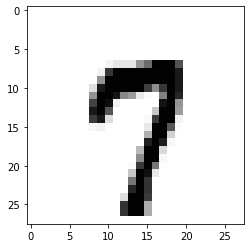

In [53]:
# Test

with torch.no_grad() : # torch.no_grad() : gradient 계산을 수행하지 않음 -> update X
  X_test = mnist_test.test_data.view(-1, 28*28).float().to(device)
  Y_test = mnist_test.test_labels.to(device)

  prediction = linear(X_test)
  correct_prediction = torch.argmax(prediction, dim = 1) == Y_test # 확률이 가장 높은 Indice의 값이 label과 같으면 Correct!
  accuracy = correct_prediction.float().mean()
  print("Accuracy : ", accuracy.item())

  # random testing
  r = random.randint(0, len(mnist_test) - 1)
  X_single_data = mnist_test.test_data[r:r+1].view(-1,28*28).float().to(device)
  Y_single_data = mnist_test.test_labels[r:r+1].to(device)

  print('Label : ', Y_single_data.item())
  single_prediction = linear(X_single_data)
  print('Prediction : ', torch.argmax(single_prediction, dim = 1).item())

  plt.imshow(mnist_test.test_data[r:r+1].view(28,28), cmap = 'Greys', interpolation = 'nearest')
  plt.show()